In [163]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [164]:
for i in range(25):
    if i==1:
        train = pd.read_pickle('salida/nuevo4i/Scitail/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/Scitail/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [165]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.173624,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,4.113044,...,0,8,0.428571,0.000000,0,,0,,0.50,neutral
1,1.307036,2.027920,1.399996,3.680716,0.006055,0.140002,0.040055,0.406013,0.406013,3.969036,...,5,5,0.300000,0.287838,0,,0,,0.00,neutral
2,1.000002,2.042037,0.945660,3.766866,0.003580,0.135649,0.034227,0.430823,0.569177,4.006910,...,1,11,0.400000,0.425054,0,,0,,0.20,entails
3,1.291779,2.083696,1.360964,3.867378,0.006807,0.165605,0.065280,0.417959,0.417959,4.239702,...,1,10,0.714286,0.375174,0,,0,,0.25,neutral
4,1.259862,2.363826,1.251629,3.873206,0.005609,0.206368,0.079562,0.449212,0.449212,4.363296,...,1,6,0.666667,0.820802,0,,0,,0.00,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,0.000000,2.245975,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.025513,...,0,8,0.571429,0.000000,1,be,0,,0.00,neutral
22093,0.999999,1.737736,0.991264,3.823160,0.003940,0.187918,0.039840,0.308760,0.308760,4.363974,...,1,13,0.200000,0.197268,0,,0,,0.20,neutral
22094,1.263206,2.324838,1.483832,3.796239,0.003821,0.202154,0.020756,0.297363,0.297363,4.530613,...,1,14,0.000000,0.374039,0,,0,,0.60,entails
22095,1.204488,2.068869,1.491115,3.796239,0.004081,0.274650,0.023366,0.385171,0.385171,4.530613,...,1,11,0.600000,0.920413,0,,0,,0.60,entails


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

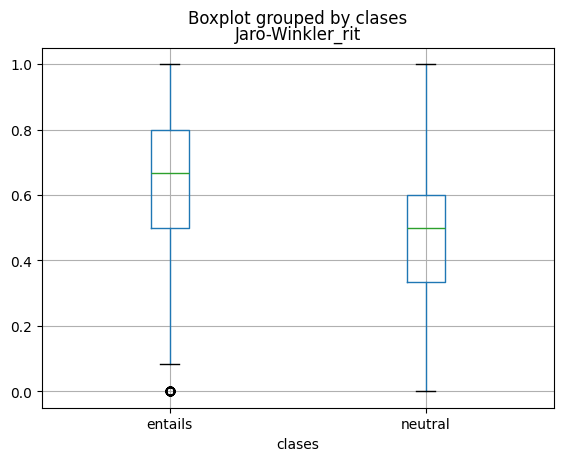

In [166]:
train.boxplot(by="clases",column=["Jaro-Winkler_rit"])

## Eliminar características

In [167]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,2.173624,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,4.113044,...,0.863121,7,0,8,0.428571,0.000000,0,0,0.50,neutral
1,1.307036,2.027920,1.399996,3.680716,0.006055,0.140002,0.040055,0.406013,0.406013,3.969036,...,1.000000,10,5,5,0.300000,0.287838,0,0,0.00,neutral
2,1.000002,2.042037,0.945660,3.766866,0.003580,0.135649,0.034227,0.430823,0.569177,4.006910,...,1.277613,10,1,11,0.400000,0.425054,0,0,0.20,entails
3,1.291779,2.083696,1.360964,3.867378,0.006807,0.165605,0.065280,0.417959,0.417959,4.239702,...,1.148835,7,1,10,0.714286,0.375174,0,0,0.25,neutral
4,1.259862,2.363826,1.251629,3.873206,0.005609,0.206368,0.079562,0.449212,0.449212,4.363296,...,1.251629,6,1,6,0.666667,0.820802,0,0,0.00,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,0.000000,2.245975,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.025513,...,0.000000,7,0,8,0.571429,0.000000,1,0,0.00,neutral
22093,0.999999,1.737736,0.991264,3.823160,0.003940,0.187918,0.039840,0.308760,0.308760,4.363974,...,0.721928,5,1,13,0.200000,0.197268,0,0,0.20,neutral
22094,1.263206,2.324838,1.483832,3.796239,0.003821,0.202154,0.020756,0.297363,0.297363,4.530613,...,0.721928,5,1,14,0.000000,0.374039,0,0,0.60,entails
22095,1.204488,2.068869,1.491115,3.796239,0.004081,0.274650,0.023366,0.385171,0.385171,4.530613,...,0.721928,5,1,11,0.600000,0.920413,0,0,0.60,entails


In [168]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [169]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [170]:
train = train[['mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','negH','negT','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]

In [171]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [172]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [173]:
train_m

,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,negH,negT,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
mutinf,1.000000,0.839477,-0.040139,-0.045082,-0.082108,-0.047976,0.011431,-0.412344,-0.753393,0.618200,0.287517,0.427666
max_info,0.839477,1.000000,-0.245952,-0.068701,-0.189142,-0.068118,0.000889,-0.489957,-0.733966,0.461320,0.410360,0.547233
list_comp,-0.040139,-0.245952,1.000000,0.011627,0.050121,0.014137,0.011581,-0.068367,-0.086459,0.013834,-0.253781,-0.052738
list_incomp,-0.045082,-0.068701,0.011627,1.000000,0.169081,0.108889,-0.006554,-0.003506,0.241232,-0.064402,-0.009416,-0.021337
rel_conceptuales,-0.082108,-0.189142,0.050121,0.169081,1.000000,0.024424,0.018277,0.004039,0.579800,-0.207861,-0.138826,-0.208977
negH,-0.047976,-0.068118,0.014137,0.108889,0.024424,1.000000,0.226796,0.044749,0.067018,-0.006452,0.000065,-0.008047
negT,0.011431,0.000889,0.011581,-0.006554,0.018277,0.226796,1.000000,-0.042813,-0.005895,0.018720,0.017565,0.021307
diferencias,-0.412344,-0.489957,-0.068367,-0.003506,0.004039,0.044749,-0.042813,1.000000,0.364947,-0.198934,-0.231496,-0.478220
entropia_relaciones,-0.753393,-0.733966,-0.086459,0.241232,0.579800,0.067018,-0.005895,0.364947,1.000000,-0.626289,-0.299640,-0.501402
nlp_semantics,0.618200,0.461320,0.013834,-0.064402,-0.207861,-0.006452,0.018720,-0.198934,-0.626289,1.000000,0.206269,0.278077


<Axes: >

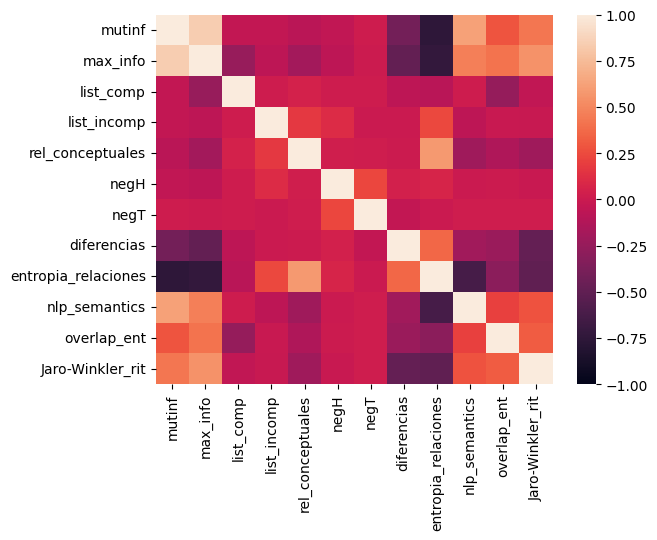

In [174]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [175]:
train_m.columns

Index(['mutinf', 'max_info', 'list_comp', 'list_incomp', 'rel_conceptuales',
       'negH', 'negT', 'diferencias', 'entropia_relaciones', 'nlp_semantics',
       'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [176]:
train_m

,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,negH,negT,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
mutinf,1.000000,0.839477,-0.040139,-0.045082,-0.082108,-0.047976,0.011431,-0.412344,-0.753393,0.618200,0.287517,0.427666
max_info,0.839477,1.000000,-0.245952,-0.068701,-0.189142,-0.068118,0.000889,-0.489957,-0.733966,0.461320,0.410360,0.547233
list_comp,-0.040139,-0.245952,1.000000,0.011627,0.050121,0.014137,0.011581,-0.068367,-0.086459,0.013834,-0.253781,-0.052738
list_incomp,-0.045082,-0.068701,0.011627,1.000000,0.169081,0.108889,-0.006554,-0.003506,0.241232,-0.064402,-0.009416,-0.021337
rel_conceptuales,-0.082108,-0.189142,0.050121,0.169081,1.000000,0.024424,0.018277,0.004039,0.579800,-0.207861,-0.138826,-0.208977
negH,-0.047976,-0.068118,0.014137,0.108889,0.024424,1.000000,0.226796,0.044749,0.067018,-0.006452,0.000065,-0.008047
negT,0.011431,0.000889,0.011581,-0.006554,0.018277,0.226796,1.000000,-0.042813,-0.005895,0.018720,0.017565,0.021307
diferencias,-0.412344,-0.489957,-0.068367,-0.003506,0.004039,0.044749,-0.042813,1.000000,0.364947,-0.198934,-0.231496,-0.478220
entropia_relaciones,-0.753393,-0.733966,-0.086459,0.241232,0.579800,0.067018,-0.005895,0.364947,1.000000,-0.626289,-0.299640,-0.501402
nlp_semantics,0.618200,0.461320,0.013834,-0.064402,-0.207861,-0.006452,0.018720,-0.198934,-0.626289,1.000000,0.206269,0.278077


In [177]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,negH,negT,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
mutinf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info,0.839477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_comp,-0.040139,-0.245952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_incomp,-0.045082,-0.068701,0.011627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
rel_conceptuales,-0.082108,-0.189142,0.050121,0.169081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
negH,-0.047976,-0.068118,0.014137,0.108889,0.024424,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
negT,0.011431,0.000889,0.011581,-0.006554,0.018277,0.226796,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
diferencias,-0.412344,-0.489957,-0.068367,-0.003506,0.004039,0.044749,-0.042813,0.000000,0.000000,0.000000,0.00000,0.0
entropia_relaciones,-0.753393,-0.733966,-0.086459,0.241232,0.579800,0.067018,-0.005895,0.364947,0.000000,0.000000,0.00000,0.0
nlp_semantics,0.618200,0.461320,0.013834,-0.064402,-0.207861,-0.006452,0.018720,-0.198934,-0.626289,0.000000,0.00000,0.0


In [178]:
coor.idxmax()

mutinf                            max_info
max_info                  Jaro-Winkler_rit
list_comp                 rel_conceptuales
list_incomp            entropia_relaciones
rel_conceptuales       entropia_relaciones
negH                                  negT
negT                      Jaro-Winkler_rit
diferencias            entropia_relaciones
entropia_relaciones                 mutinf
nlp_semantics             Jaro-Winkler_rit
overlap_ent               Jaro-Winkler_rit
Jaro-Winkler_rit                    mutinf
dtype: object

In [179]:
coor.max()

mutinf                 0.839477
max_info               0.547233
list_comp              0.050121
list_incomp            0.241232
rel_conceptuales       0.579800
negH                   0.226796
negT                   0.021307
diferencias            0.364947
entropia_relaciones    0.000000
nlp_semantics          0.278077
overlap_ent            0.316260
Jaro-Winkler_rit       0.000000
dtype: float64

In [180]:
coor.idxmin()

mutinf                 entropia_relaciones
max_info               entropia_relaciones
list_comp                      overlap_ent
list_incomp                  nlp_semantics
rel_conceptuales          Jaro-Winkler_rit
negH                      Jaro-Winkler_rit
negT                           diferencias
diferencias               Jaro-Winkler_rit
entropia_relaciones          nlp_semantics
nlp_semantics                       mutinf
overlap_ent                         mutinf
Jaro-Winkler_rit                    mutinf
dtype: object

In [181]:
coor.min()

mutinf                -0.753393
max_info              -0.733966
list_comp             -0.253781
list_incomp           -0.064402
rel_conceptuales      -0.208977
negH                  -0.008047
negT                  -0.042813
diferencias           -0.478220
entropia_relaciones   -0.626289
nlp_semantics          0.000000
overlap_ent            0.000000
Jaro-Winkler_rit       0.000000
dtype: float64

In [182]:
cols=train_m.columns

In [183]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

max_info mutinf 0.8394767644635748


In [184]:
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

entropia_relaciones mutinf -0.7533932438574436
entropia_relaciones max_info -0.7339656850095809


In [185]:
# Checar variables colineales
#sns.relplot(data=train_m, x="max_info", y="mutinf")

In [186]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [187]:
# SICK
y_train=[]
for i in y_:
    if i == "entails":
        y_train.append(1)
    else:
        y_train.append(0)

In [188]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

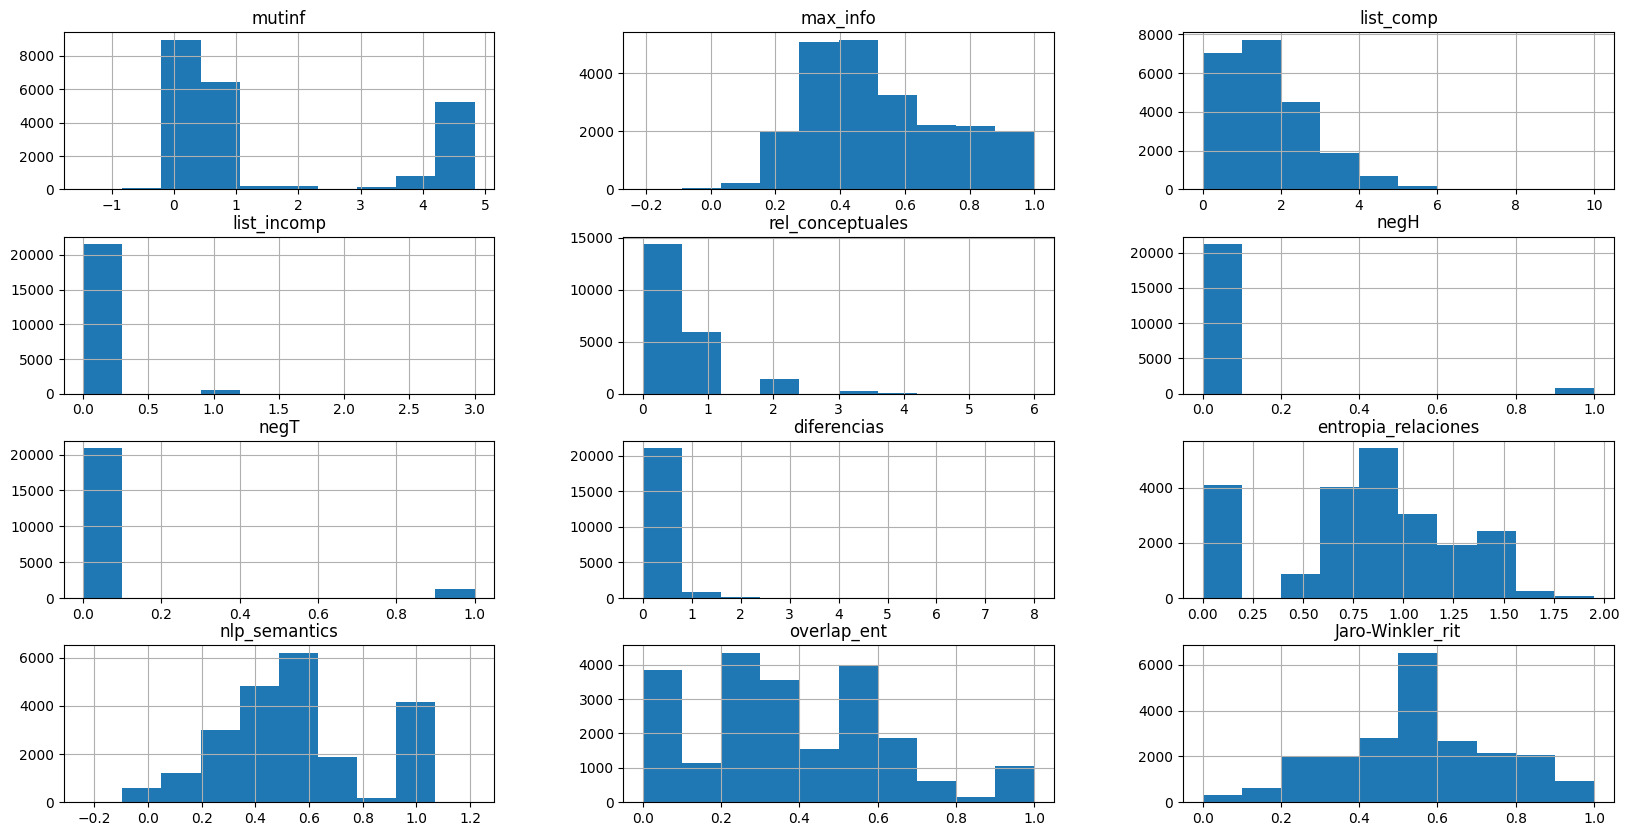

In [189]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [190]:
for i in range(3):
    if i==0:
        test = pd.read_pickle('salida/nuevo4i/Scitail/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/Scitail/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [191]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.990113,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,4.182847,...,0,15,0.750000,0.000000,0,,0,,0.25,neutral
1,1.208441,1.898413,2.057717,3.813580,0.004296,0.269330,0.055955,0.422462,0.422462,4.202914,...,2,10,0.545455,0.269007,0,,0,,0.20,neutral
2,0.000000,2.410722,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.482404,...,0,9,0.833333,0.000000,0,,0,,0.40,neutral
3,1.000050,2.104136,2.046439,3.679210,0.004659,0.233474,0.081911,0.755357,0.755357,4.090163,...,2,5,0.285714,0.227179,0,,0,,0.00,neutral
4,1.279029,2.332095,1.722266,3.763004,0.006580,0.180310,0.068500,0.472561,0.472561,4.127185,...,3,6,0.428571,0.331455,0,,0,,0.25,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.138582,2.186807,2.235926,3.929728,0.004470,0.351815,0.098332,0.499255,0.499255,4.248794,...,1,21,0.700000,0.324052,0,,0,,0.20,neutral
2122,1.292927,1.874472,1.298795,3.824950,0.005680,0.164153,0.051997,0.579175,0.579175,4.268414,...,2,8,0.666667,0.194310,0,,0,,0.25,neutral
2123,1.179173,2.367277,2.058746,3.760419,0.006041,0.297178,0.075618,0.560328,0.560328,4.147063,...,3,8,0.444444,0.310689,0,,0,,0.20,neutral
2124,0.000000,2.287102,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.457893,...,0,8,0.250000,0.000000,0,,0,,0.00,neutral


In [192]:
test=test.drop(["verbH","verbT"],axis=1)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,1.990113,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,4.182847,...,0.543564,8,0,15,0.750000,0.000000,0,0,0.25,neutral
1,1.208441,1.898413,2.057717,3.813580,0.004296,0.269330,0.055955,0.422462,0.422462,4.202914,...,1.309297,11,2,10,0.545455,0.269007,0,0,0.20,neutral
2,0.000000,2.410722,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.482404,...,1.148835,6,0,9,0.833333,0.000000,0,0,0.40,neutral
3,1.000050,2.104136,2.046439,3.679210,0.004659,0.233474,0.081911,0.755357,0.755357,4.090163,...,1.556657,7,2,5,0.285714,0.227179,0,0,0.00,neutral
4,1.279029,2.332095,1.722266,3.763004,0.006580,0.180310,0.068500,0.472561,0.472561,4.127185,...,0.985228,7,3,6,0.428571,0.331455,0,0,0.25,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.138582,2.186807,2.235926,3.929728,0.004470,0.351815,0.098332,0.499255,0.499255,4.248794,...,0.921928,10,1,21,0.700000,0.324052,0,0,0.20,neutral
2122,1.292927,1.874472,1.298795,3.824950,0.005680,0.164153,0.051997,0.579175,0.579175,4.268414,...,1.224394,9,2,8,0.666667,0.194310,0,0,0.25,neutral
2123,1.179173,2.367277,2.058746,3.760419,0.006041,0.297178,0.075618,0.560328,0.560328,4.147063,...,1.351644,9,3,8,0.444444,0.310689,0,0,0.20,neutral
2124,0.000000,2.287102,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.457893,...,0.000000,4,0,8,0.250000,0.000000,0,0,0.00,neutral


In [193]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [194]:
test = test[['mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','negH','negT','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]


In [195]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,negH,negT,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,4.182847,0.643081,3,0,1,0,0,0.000000,0.543564,0.500000,0.25,0.750000,neutral
1,0.389334,0.300688,2,0,2,0,0,0.200000,1.309297,0.422462,0.20,0.545455,neutral
2,4.482404,0.927331,0,1,1,0,0,0.000000,1.148835,0.000000,0.40,0.833333,neutral
3,0.410953,0.310154,0,0,2,0,0,0.400000,1.556657,0.755357,0.00,0.285714,neutral
4,0.364181,0.381008,1,0,0,0,0,0.500000,0.985228,0.472561,0.25,0.428571,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.319067,0.341594,3,0,1,0,0,0.047619,0.921928,0.499255,0.20,0.700000,neutral
2122,0.443464,0.493046,1,0,1,0,0,0.250000,1.224394,0.579175,0.25,0.666667,neutral
2123,0.386644,0.308401,1,0,1,0,0,0.375000,1.351644,0.560328,0.20,0.444444,neutral
2124,4.457893,0.802590,1,0,0,0,0,0.000000,0.000000,1.000000,0.00,0.250000,neutral


In [196]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [197]:
# SICK
y_test=[]
for i in y_t:
    if i == "entails":
        y_test.append(1)
    else:
        y_test.append(0)

In [198]:
y_test.count(1)

842

In [199]:
y_test.count(0)

1284

In [200]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [201]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [202]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [203]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [204]:
X_train.shape

(22097, 12)

In [205]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [206]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [207]:
model.decision_function(X)

array([-0.73544696, -2.98199651, -0.58328326, ..., -1.43995049,
       -0.0357953 ,  0.58397436])

In [208]:
labels=train.columns[:-1]
labels

Index(['mutinf', 'max_info', 'list_comp', 'list_incomp', 'rel_conceptuales',
       'negH', 'negT', 'diferencias', 'entropia_relaciones', 'nlp_semantics',
       'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [209]:
model.classes_

array([0, 1])

In [210]:
model.coef_[0]

array([-2.19455182,  4.11271643,  1.3317713 ,  1.55630749,  3.40643698,
        0.86534092, -0.32164216, -0.90739749, -2.90329963,  0.63749014,
        1.24663826,  2.66483255])

In [211]:
coeficientes=model.coef_[0]

In [212]:
coeficientes

array([-2.19455182,  4.11271643,  1.3317713 ,  1.55630749,  3.40643698,
        0.86534092, -0.32164216, -0.90739749, -2.90329963,  0.63749014,
        1.24663826,  2.66483255])

In [213]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 max_info 8 entropia_relaciones


In [214]:
n_columns=train.shape[1]-1

In [215]:
n_columns

12

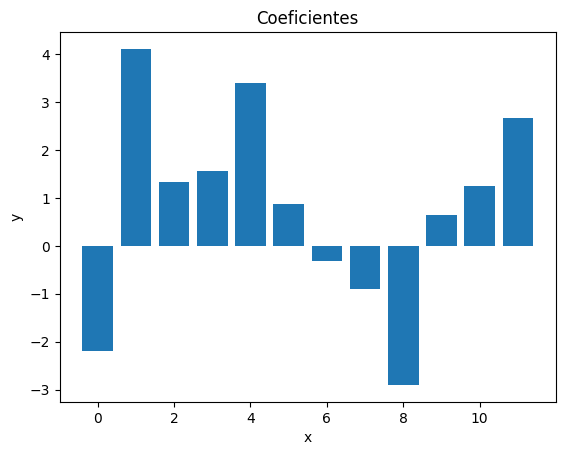

In [216]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [217]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [218]:
X_test.shape

(2126, 12)

In [219]:
predictions = model.predict(X_test)

In [220]:
predictions

array([1, 0, 1, ..., 0, 0, 0])

In [221]:
test["predictions"]=predictions
test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,negH,negT,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predictions
0,4.182847,0.643081,3,0,1,0,0,0.000000,0.543564,0.500000,0.25,0.750000,neutral,1
1,0.389334,0.300688,2,0,2,0,0,0.200000,1.309297,0.422462,0.20,0.545455,neutral,0
2,4.482404,0.927331,0,1,1,0,0,0.000000,1.148835,0.000000,0.40,0.833333,neutral,1
3,0.410953,0.310154,0,0,2,0,0,0.400000,1.556657,0.755357,0.00,0.285714,neutral,0
4,0.364181,0.381008,1,0,0,0,0,0.500000,0.985228,0.472561,0.25,0.428571,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.319067,0.341594,3,0,1,0,0,0.047619,0.921928,0.499255,0.20,0.700000,neutral,1
2122,0.443464,0.493046,1,0,1,0,0,0.250000,1.224394,0.579175,0.25,0.666667,neutral,0
2123,0.386644,0.308401,1,0,1,0,0,0.375000,1.351644,0.560328,0.20,0.444444,neutral,0
2124,4.457893,0.802590,1,0,0,0,0,0.000000,0.000000,1.000000,0.00,0.250000,neutral,0


In [222]:
test[(test["clases"]=="entails") & (test["predictions"]==0)]

,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,negH,negT,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predictions
17,0.219981,0.247864,3,0,2,0,0,0.125000,1.298795,0.603853,0.166667,0.250000,entails,0
21,0.340699,0.384907,2,0,0,0,0,0.375000,0.918296,0.636424,0.500000,0.555556,entails,0
35,0.531460,0.171547,4,0,0,0,0,0.153846,0.684038,0.645265,0.333333,0.727273,entails,0
42,0.347529,0.321543,1,0,2,0,0,0.375000,1.485475,0.445973,0.142857,0.500000,entails,0
45,0.552361,0.472683,1,0,0,0,0,0.181818,0.811278,0.357878,0.250000,0.625000,entails,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.412733,0.519937,0,0,0,0,0,0.142857,0.918296,0.538623,0.666667,0.666667,entails,0
2102,0.683725,0.679105,0,0,0,0,0,0.090909,0.721928,0.281712,0.333333,0.400000,entails,0
2109,0.742073,0.687204,0,0,0,0,0,0.200000,0.721928,0.519314,0.333333,0.400000,entails,0
2115,0.671429,0.543178,0,0,0,0,0,0.066667,0.721928,0.502735,0.333333,0.400000,entails,0


In [223]:
#test.to_csv("predictions_SICK_DEV.csv")

In [224]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 551  291]
 [ 233 1051]]


In [225]:
# [[ 770  634]
#  [ 461 3041]]
#  acccuracy:  0.78
# precision:  0.63
# recall 0.55
# f1_score:  0.58
# matthews_score:  0.43
# [[ 970  434]
#  [ 495 3007]]
# acccuracy:  0.81
# precision:  0.66
# recall 0.69
# f1_score:  0.68
# matthews_score:  0.54

In [226]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.75
precision:  0.7
recall 0.65
f1_score:  0.68
matthews_score:  0.48


In [227]:
# [[1009  395]
#  [ 471 3031]]
#  acccuracy:  0.82
# precision:  0.68
# recall 0.72
# f1_score:  0.7
# matthews_score:  0.58

In [228]:
# [[1010  394]
#  [ 480 3022]]
# acccuracy:  0.82
# precision:  0.68
# recall 0.72
# f1_score:  0.7
# matthews_score:  0.57

In [229]:
X_train.shape

(22097, 12)

In [230]:
X_test.shape

(2126, 12)

In [231]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [232]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [233]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.750000 (0.020868)
Logistic Regression Precision:: 0.750000 (0.020390)
Logistic Regression Recall:: 0.750000 (0.020868)
Logistic Regression F1-score:: 0.750000 (0.021339)


In [234]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.710000 (0.011794)
Logistic Regression Recall:: 0.580000 (0.019572)
Logistic Regression F1-score:: 0.640000 (0.015857)


In [235]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.740000 (0.020537)
Logistic Regression Recall:: 0.720000 (0.021634)
Logistic Regression F1-score:: 0.720000 (0.021247)


In [236]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.750000 (0.020868)
Logistic Regression Recall:: 0.750000 (0.020868)
Logistic Regression F1-score:: 0.750000 (0.020868)


In [237]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.450000 (0.041301)


In [238]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [239]:
#linear_model

In [240]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [241]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1284
           1       0.70      0.65      0.68       842

    accuracy                           0.75      2126
   macro avg       0.74      0.74      0.74      2126
weighted avg       0.75      0.75      0.75      2126



In [80]:
#  precision    recall  f1-score   support

#            0       0.88      0.86      0.87      3502
#            1       0.68      0.72      0.70      1404

#     accuracy                           0.82      4906
#    macro avg       0.78      0.79      0.79      4906
# weighted avg       0.83      0.82      0.82      4906

#  precision    recall  f1-score   support

#            0       0.86      0.88      0.87      3502
#            1       0.68      0.64      0.66      1404

#     accuracy                           0.81      4906
#    macro avg       0.77      0.76      0.76      4906
# weighted avg       0.81      0.81      0.81      4906

In [85]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [86]:
test.columns[:-2]

Index(['mutinf', 'max_info', 'list_comp', 'list_incomp', 'rel_conceptuales',
       'negH', 'negT', 'diferencias', 'entropia_relaciones', 'nlp_semantics',
       'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [87]:
explainer.expected_value

-0.832262288436219

In [88]:
X_test

array([[0.87162696, 0.64308075, 0.375     , ..., 0.49999999, 0.25      ,
        0.75      ],
       [0.0811299 , 0.30068808, 0.25      , ..., 0.4224621 , 0.2       ,
        0.54545455],
       [0.93404915, 0.92733086, 0.        , ..., 0.        , 0.4       ,
        0.83333333],
       ...,
       [0.0805693 , 0.30840139, 0.125     , ..., 0.56032828, 0.2       ,
        0.44444444],
       [0.92894158, 0.80259004, 0.125     , ..., 0.99999998, 0.        ,
        0.25      ],
       [0.09021003, 0.45803094, 0.125     , ..., 0.62773026, 0.6       ,
        0.375     ]])

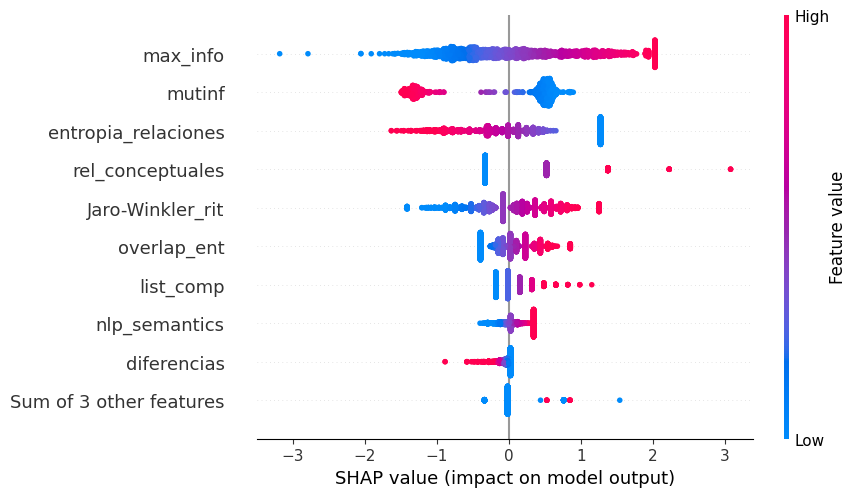

In [89]:
shap.plots.beeswarm(shap_values)

In [77]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.87556685 0.         0.         0.         0.
 0.         0.8375496  0.21256247 0.58725685 0.305726   0.66666667
 0.         0.33333333 0.         0.5        0.4        0.
 0.         0.45914792 0.375      0.         0.4        0.66666667
 0.         0.         0.         0.25      ] 0 0


IndexError: index 28 is out of bounds for axis 0 with size 28

In [78]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.91739828 0.53761146 0.46688595 0.95367512 0.16914902 0.12700167
 0.08835622 0.85470472 0.22051327 0.4067985  0.15215869 0.33333333
 0.         0.         0.66666667 0.         0.         0.08163265
 0.         0.45914792 0.1875     0.2        0.46666667 0.33333333
 0.06419812 0.         0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

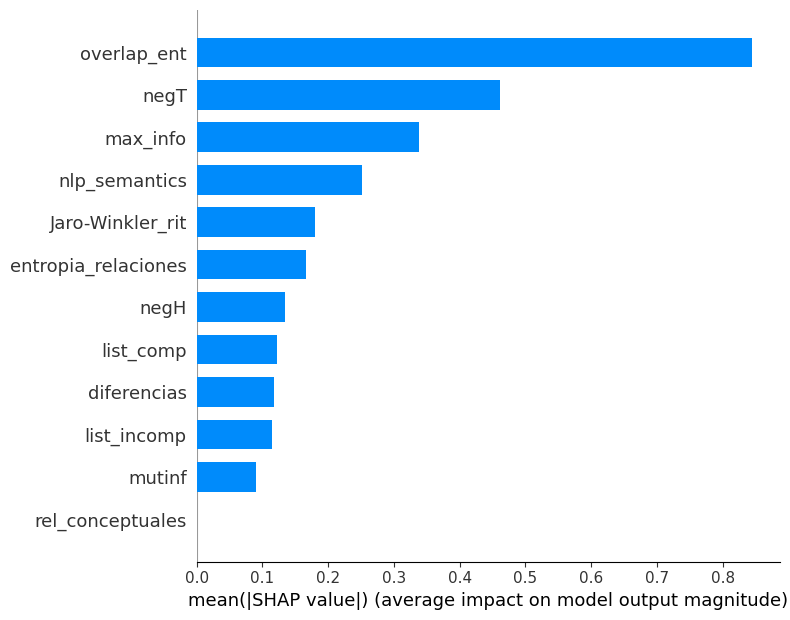

In [87]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

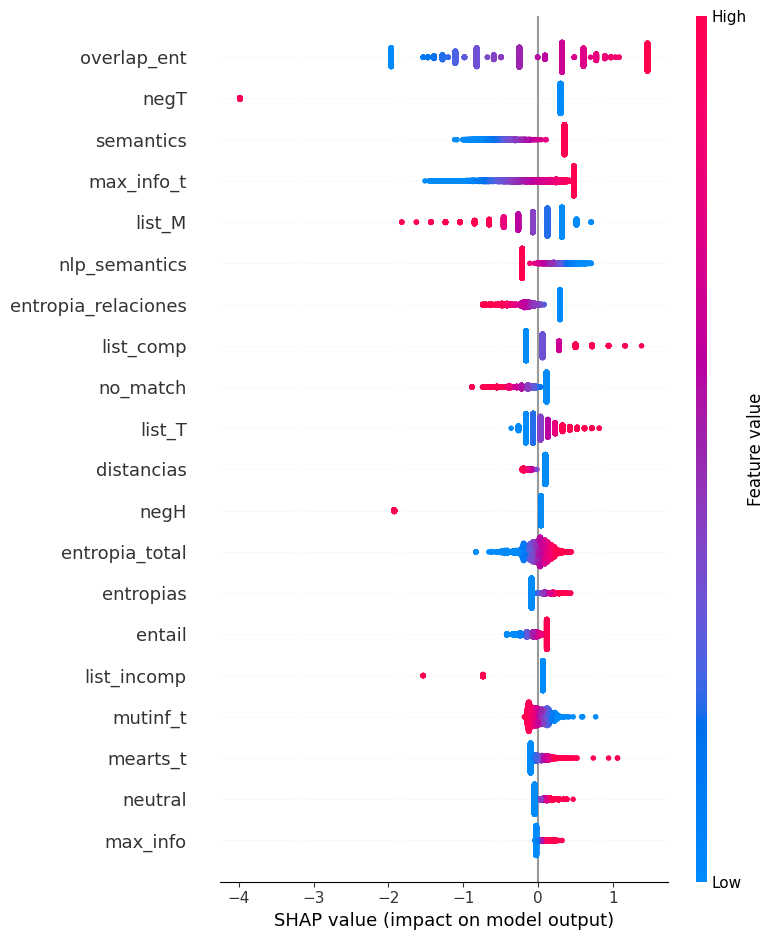

In [82]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

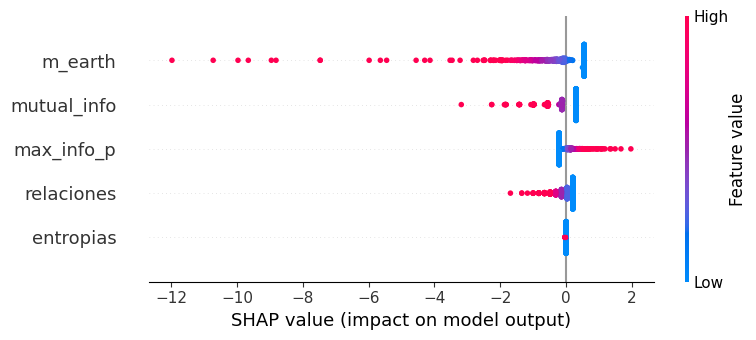

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

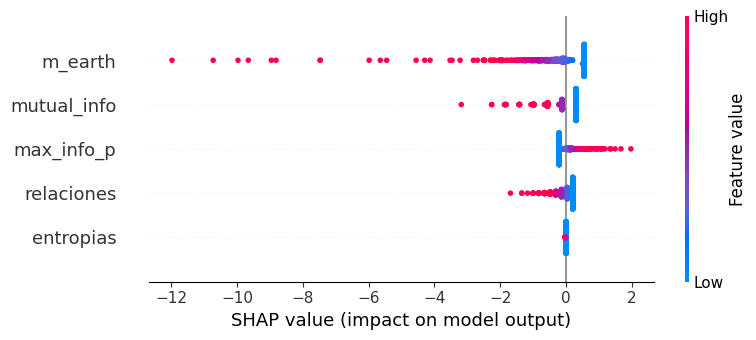

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.78
precision:  0.61
recall 0.69
f1_score:  0.65
matthews_score:  0.49


In [86]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [87]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.670000 (0.048836)
DecisionTree: 0.660000 (0.035226)
DecisionTree: 0.670000 (0.033797)


In [88]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[2874,  628],
       [ 434,  970]])

Profundidad del árbol: 29
Número de nodos terminales: 1014


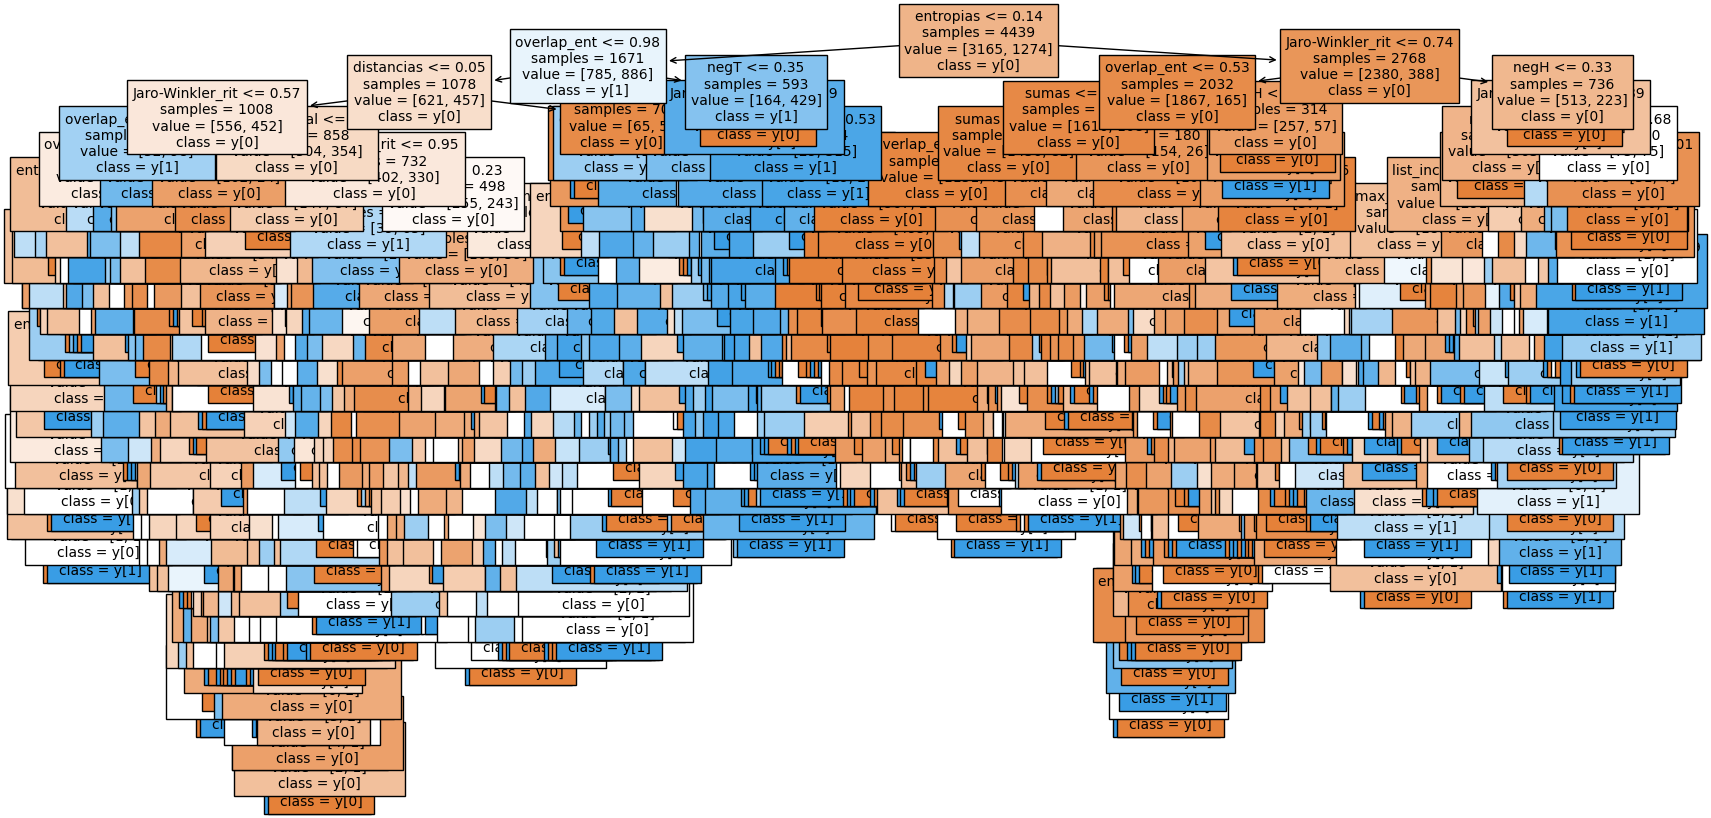

In [89]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )